<a href="https://colab.research.google.com/github/kelseymatsik/project_chd/blob/main/LinearRegressionModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
! git clone https://www.github.com/kelseymatsik/project_chd

fatal: destination path 'project_chd' already exists and is not an empty directory.


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
df = pd.read_csv('/content/drive/My Drive/Spring 2024/DS 3001/cleaned_chd_training_set.csv', index_col=0)
df.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,stroke,hypertensive,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,tenYearRisk
0,1.0,58.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,220.0,143.0,104.0,29.85,75.0,87.000000,1.0
1,0.0,40.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,199.0,122.0,82.0,22.16,85.0,77.000000,0.0
2,0.0,52.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,112.0,71.0,25.68,80.0,77.333333,0.0
3,1.0,38.0,2.0,1.0,43.0,0.0,0.0,1.0,0.0,170.0,130.0,94.0,23.90,110.0,75.000000,0.0
4,0.0,43.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,202.0,124.0,92.0,21.26,75.0,74.000000,0.0


### CigsPerDay and Sex

In [16]:
df.loc[:,['cigsPerDay', 'sex'] ].groupby('sex').describe()

cigsPerDay                                                  
         count       mean        std  min  25%   50%   75%   max
sex                                                             
0.0     1803.0   5.562304   8.798145  0.0  0.0   0.0  10.0  43.0
1.0     1377.0  13.448923  13.953747  0.0  0.0  15.0  20.0  70.0

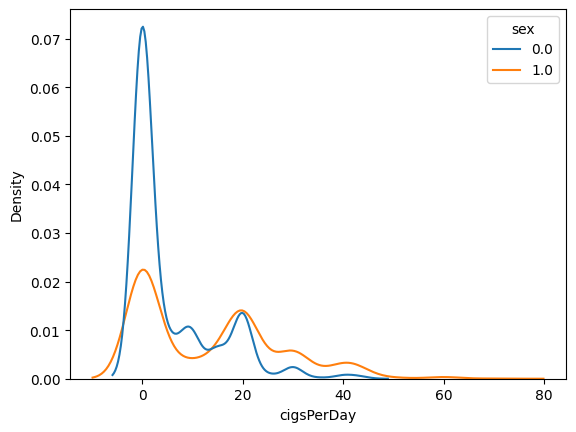

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


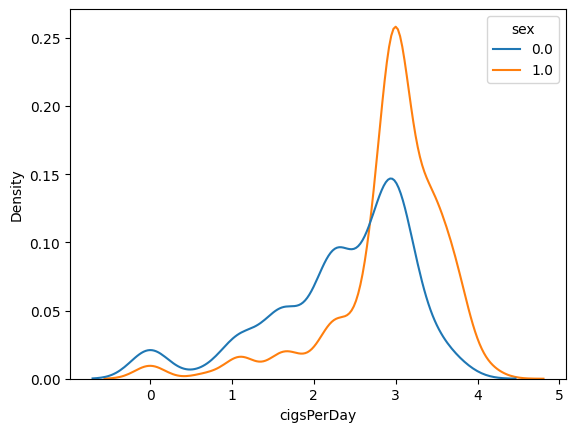

In [59]:
sns.kdeplot(x=df['cigsPerDay'], hue=df['sex'])
plt.show()

sns.kdeplot(x=np.log(df['cigsPerDay']), hue=df['sex'])
plt.show()

In [18]:
y = df['cigsPerDay']
X = pd.get_dummies(df['sex'], dtype='int')

from sklearn import linear_model

reg = linear_model.LinearRegression(fit_intercept=False).fit(X, y)

feature_names = X.columns
coefficients = reg.coef_

results = pd.DataFrame({'variable': feature_names, 'coefficient': coefficients})
print(results)

   variable  coefficient
0       0.0     5.562304
1       1.0    13.448923


In [57]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

train_data = pd.read_csv('/content/drive/My Drive/Spring 2024/DS 3001/cleaned_chd_training_set.csv', index_col=0)
test_data = pd.read_csv('/content/drive/My Drive/Spring 2024/DS 3001/cleaned_chd_test_set.csv', index_col=0)

y = df['cigsPerDay']
X = pd.get_dummies(df['sex'], dtype='int')

y_train = train_data['cigsPerDay']
y_test = test_data['cigsPerDay']

X_train = pd.get_dummies(train_data['sex'], dtype='int')
X_test = pd.get_dummies(test_data['sex'], dtype='int')

reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("Rsq:", r2)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

Rsq: 0.13070353221928
RMSE: 0.4619784006160285


### Total Cholesterol and Hypertension

In [20]:
df.loc[:,['totChol', 'hypertensive'] ].groupby('hypertensive').describe()

totChol                                                          
               count        mean        std    min    25%    50%    75%    max
hypertensive                                                                  
0.0           2159.0  231.503551  41.861955  113.0  202.0  229.0  257.0  464.0
1.0           1021.0  247.509958  48.160724  107.0  217.0  244.0  272.0  696.0

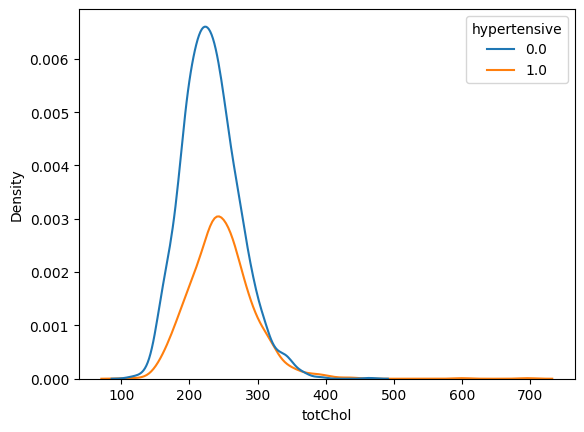

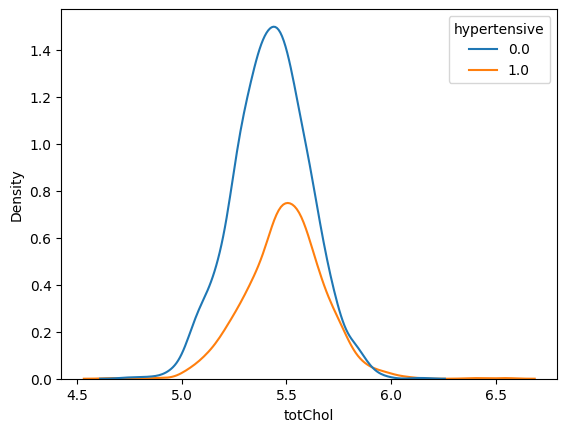

In [21]:
sns.kdeplot(x=df['totChol'], hue=df['hypertensive'])
plt.show()

sns.kdeplot(x=np.log(df['totChol']), hue=df['hypertensive'])
plt.show()

In [22]:
y = df['totChol']
X = pd.get_dummies(df['hypertensive'], dtype='int')

from sklearn import linear_model

reg = linear_model.LinearRegression(fit_intercept=False).fit(X, y)

feature_names = X.columns
coefficients = reg.coef_

results = pd.DataFrame({'variable': feature_names, 'coefficient': coefficients})
print(results)

   variable  coefficient
0       0.0   231.503551
1       1.0   247.509958


In [23]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

train_data = pd.read_csv('/content/drive/My Drive/Spring 2024/DS 3001/cleaned_chd_training_set.csv', index_col=0)
test_data = pd.read_csv('/content/drive/My Drive/Spring 2024/DS 3001/cleaned_chd_test_set.csv', index_col=0)

y = df['totChol']
X = pd.get_dummies(df['hypertensive'], dtype='int')

y_train = train_data['totChol']
y_test = test_data['totChol']

X_train = pd.get_dummies(train_data['hypertensive'], dtype='int')
X_test = pd.get_dummies(test_data['hypertensive'], dtype='int')

reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("Rsq:", r2)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

Rsq: 0.026783920671942907
RMSE: 41.04507199677363


### Glucose and Ten Year Risk

In [26]:
df.loc[:,['glucose', 'tenYearRisk'] ].groupby('tenYearRisk').describe()

glucose                                                     
              count       mean        std   min   25%   50%   75%    max
tenYearRisk                                                             
0.0          2693.0  80.622478  18.205775  40.0  72.0  78.0  86.0  370.0
1.0           487.0  88.520534  38.529157  40.0  72.0  79.0  89.0  394.0

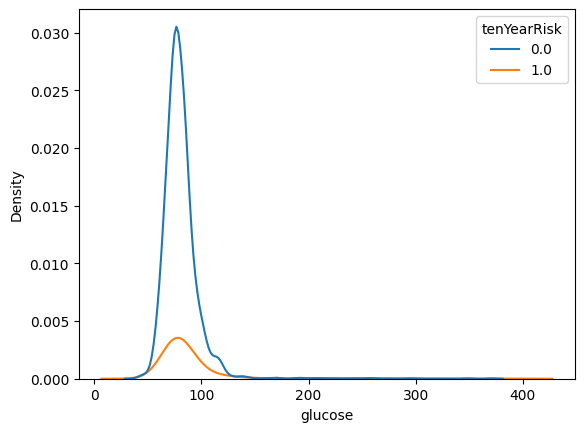

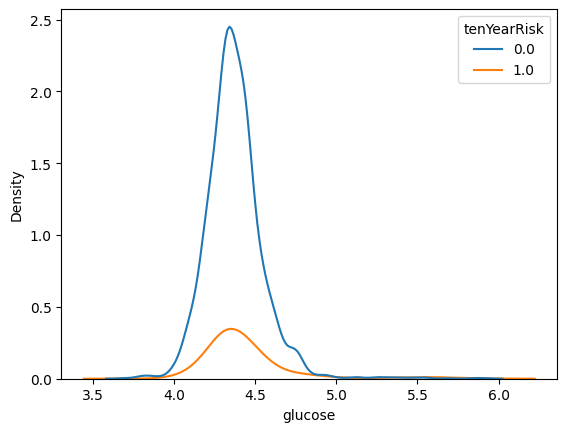

In [25]:
sns.kdeplot(x=df['glucose'], hue=df['tenYearRisk'])
plt.show()

sns.kdeplot(x=np.log(df['glucose']), hue=df['tenYearRisk'])
plt.show()

In [27]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

train_data = pd.read_csv('/content/drive/My Drive/Spring 2024/DS 3001/cleaned_chd_training_set.csv', index_col=0)
test_data = pd.read_csv('/content/drive/My Drive/Spring 2024/DS 3001/cleaned_chd_test_set.csv', index_col=0)

y = df['glucose']
X = pd.get_dummies(df['tenYearRisk'], dtype='int')

y_train = train_data['glucose']
y_test = test_data['glucose']

X_train = pd.get_dummies(train_data['tenYearRisk'], dtype='int')
X_test = pd.get_dummies(test_data['tenYearRisk'], dtype='int')

reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("Rsq:", r2)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

Rsq: -0.058125008701965575
RMSE: 11.71831915445176


### Cigs Per Day and Ten Year Risk

In [32]:
df.loc[:,['cigsPerDay', 'tenYearRisk'] ].groupby('tenYearRisk').describe()

cigsPerDay                                                 
                 count       mean        std  min  25%  50%   75%   max
tenYearRisk                                                            
0.0             2693.0   8.738025  11.750425  0.0  0.0  0.0  20.0  70.0
1.0              487.0  10.300821  13.089371  0.0  0.0  0.0  20.0  60.0

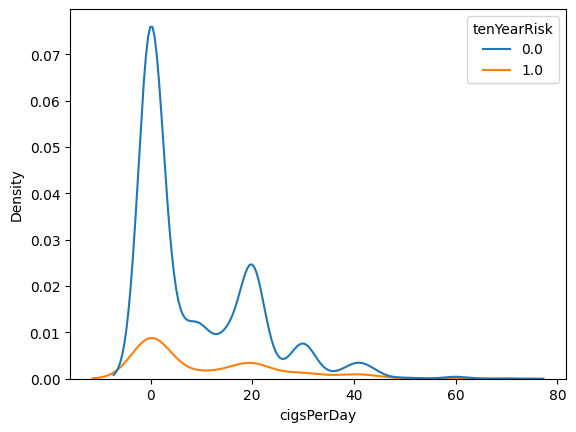

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


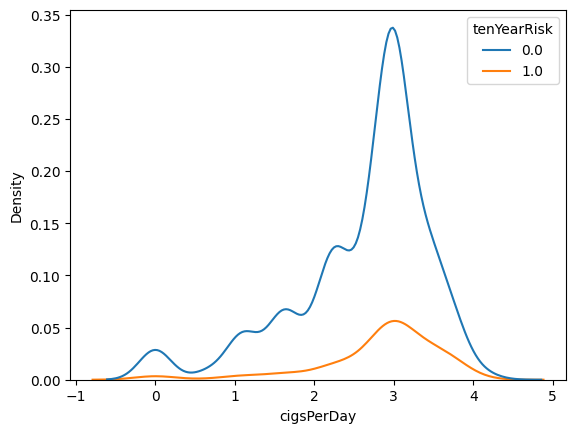

In [29]:
sns.kdeplot(x=df['cigsPerDay'], hue=df['tenYearRisk'])
plt.show()

sns.kdeplot(x=np.log(df['cigsPerDay']), hue=df['tenYearRisk'])
plt.show()

In [63]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

train_data = pd.read_csv('/content/drive/My Drive/Spring 2024/DS 3001/cleaned_chd_training_set.csv', index_col=0)
test_data = pd.read_csv('/content/drive/My Drive/Spring 2024/DS 3001/cleaned_chd_test_set.csv', index_col=0)

y = df['tenYearRisk']
X = pd.get_dummies(df['cigsPerDay'], dtype='int')

y_train = train_data['tenYearRisk']
y_test = test_data['tenYearRisk']

X_train = pd.get_dummies(train_data['cigsPerDay'], dtype='int')
X_test = pd.get_dummies(test_data['cigsPerDay'], dtype='int')

reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("Rsq:", r2)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

Rsq: 0.012824892899119478
RMSE: 0.35781013274469853


### Age and Ten Year Risk


In [82]:
df.loc[:,['age', 'tenYearRisk'] ].groupby('tenYearRisk').describe()

age                                                   
              count       mean       std   min   25%   50%   75%   max
tenYearRisk                                                           
0.0          2693.0  48.813219  8.405781  32.0  42.0  48.0  55.0  70.0
1.0           487.0  54.172485  7.954541  35.0  48.0  55.0  61.0  70.0

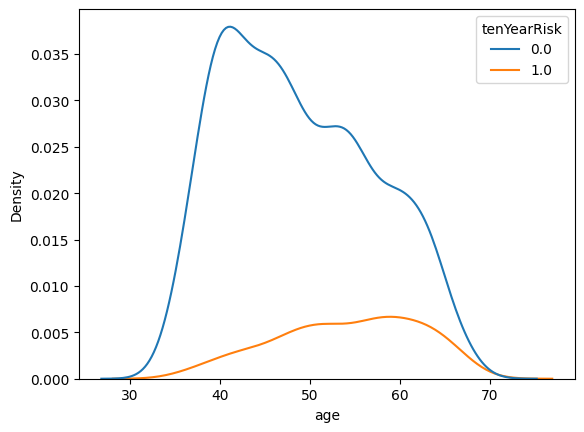

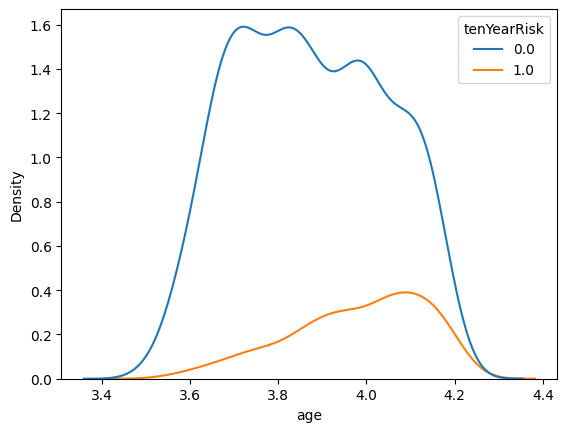

In [73]:
sns.kdeplot(x=df['age'], hue=df['tenYearRisk'])
plt.show()

sns.kdeplot(x=np.log(df['age']), hue=df['tenYearRisk'])
plt.show()

In [75]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

train_data = pd.read_csv('/content/drive/My Drive/Spring 2024/DS 3001/cleaned_chd_training_set.csv', index_col=0)
test_data = pd.read_csv('/content/drive/My Drive/Spring 2024/DS 3001/cleaned_chd_test_set.csv', index_col=0)

y = df['tenYearRisk']
X = pd.get_dummies(df['age'], dtype='int')

y_train = train_data['tenYearRisk']
y_test = test_data['tenYearRisk']

X_train = pd.get_dummies(train_data['age'], dtype='int')
X_test = pd.get_dummies(test_data['age'], dtype='int')

reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("Rsq:", r2)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

Rsq: 0.059001156011804334
RMSE: 0.34934142084187847


### Education and Hypertension

In [81]:
df.loc[:,['education', 'hypertensive'] ].groupby('hypertensive').describe()

education                                             
                 count      mean       std  min  25%  50%  75%  max
hypertensive                                                       
0.0             2159.0  2.015748  1.002781  1.0  1.0  2.0  3.0  4.0
1.0             1021.0  1.834150  0.984313  1.0  1.0  2.0  2.0  4.0

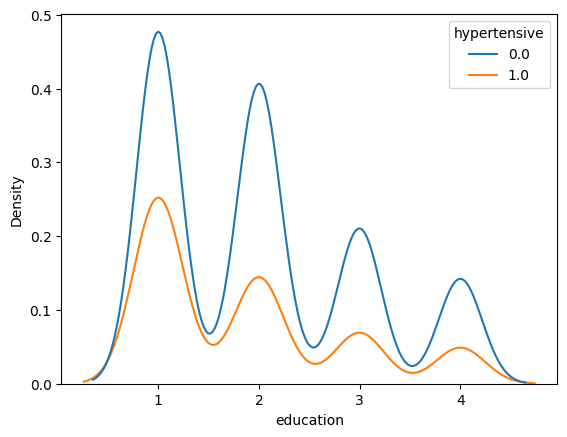

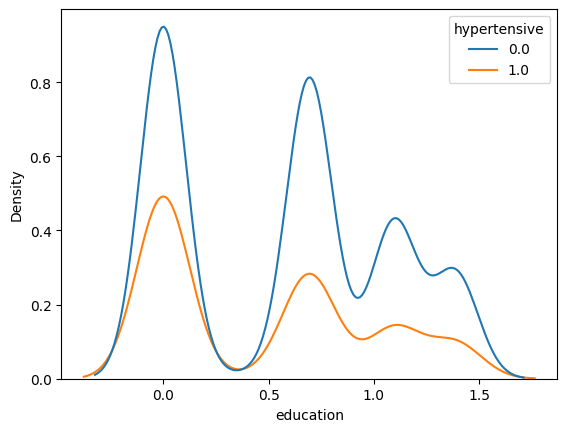

In [79]:
sns.kdeplot(x=df['education'], hue=df['hypertensive'])
plt.show()

sns.kdeplot(x=np.log(df['education']), hue=df['hypertensive'])
plt.show()

In [80]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

train_data = pd.read_csv('/content/drive/My Drive/Spring 2024/DS 3001/cleaned_chd_training_set.csv', index_col=0)
test_data = pd.read_csv('/content/drive/My Drive/Spring 2024/DS 3001/cleaned_chd_test_set.csv', index_col=0)

y = df['hypertensive']
X = pd.get_dummies(df['education'], dtype='int')

y_train = train_data['hypertensive']
y_test = test_data['hypertensive']

X_train = pd.get_dummies(train_data['education'], dtype='int')
X_test = pd.get_dummies(test_data['education'], dtype='int')

reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("Rsq:", r2)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

Rsq: 0.011848261951341699
RMSE: 0.4641131691624836
